In [ ]:
# So sánh các tokenizer khác nhau
from transformers import AutoTokenizer

# Load different tokenizers
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Hello world! This is a test of tokenization methods."

print("GPT-2 Tokenization:")
gpt2_tokens = gpt2_tokenizer.encode(text)
print(f"Tokens: {gpt2_tokens}")
print(f"Decoded: {[gpt2_tokenizer.decode([t]) for t in gpt2_tokens]}")

print("\nBERT Tokenization:")
bert_tokens = bert_tokenizer.encode(text)
print(f"Tokens: {bert_tokens}")
print(f"Decoded: {[bert_tokenizer.decode([t]) for t in bert_tokens]}")

In [2]:
def count_tokens(text, tokenizer_name="gpt2"):
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    tokens = tokenizer.encode(text)
    return len(tokens)

# Test với different text lengths
texts = [
    "Hi",
    "Hello world!",
    "This is a longer sentence to test tokenization.",
    "This is a much longer paragraph that contains multiple sentences. It should demonstrate how token count increases with text length. We can use this to understand context window limitations."
]

for text in texts:
    token_count = count_tokens(text)
    print(f"Text: '{text[:50]}{'...' if len(text) > 50 else ''}' → {token_count} tokens")

Text: 'Hi' → 1 tokens
Text: 'Hello world!' → 3 tokens
Text: 'This is a longer sentence to test tokenization.' → 10 tokens
Text: 'This is a much longer paragraph that contains mult...' → 32 tokens


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

d:\Works\repos\training_15minutes_ai\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\longv\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

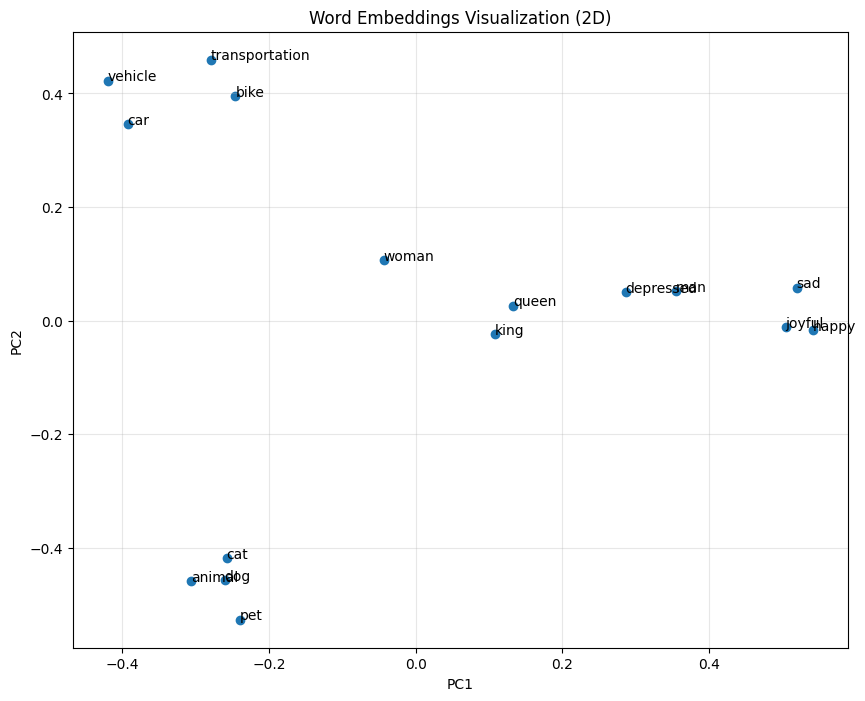

In [3]:
# Visualization của Word Embeddings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Import sentence_transformers với error handling
try:
    from sentence_transformers import SentenceTransformer
    
    # Load sentence transformer model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Example words/phrases
    texts = [
        "king", "queen", "man", "woman",
        "happy", "sad", "joyful", "depressed",
        "cat", "dog", "animal", "pet",
        "car", "vehicle", "transportation", "bike"
    ]
    
    # Get embeddings
    embeddings = model.encode(texts)
    
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
    
    # Add labels
    for i, txt in enumerate(texts):
        plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    
    plt.title("Word Embeddings Visualization (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True, alpha=0.3)
    plt.show()
    
except ImportError as e:
    print(f"Lỗi import: {e}")
    print("Hãy chạy: pip install --upgrade sentence-transformers")
except Exception as e:
    print(f"Lỗi khác: {e}")
    print("Hãy restart kernel và thử lại")

In [7]:
def test_context_limits(base_text, max_tokens=100):
    """Test how models handle long context"""
    tokenizer = AutoTokenizer.from_pretrained("gpt2")
    
    # Gradually increase text length
    multipliers = [1, 2, 5, 10, 20]
    
    for mult in multipliers:
        text = base_text * mult
        token_count = len(tokenizer.encode(text))
        
        status = "✅ OK" if token_count < max_tokens else "❌ Too long"
        print(f"Text length: {len(text)} chars, Tokens: {token_count}, Status: {status}")
        
        if token_count > max_tokens:
            print(f"Exceeded limit by {token_count - max_tokens} tokens")
            break

# Test với sample text
sample_text = "This is a sample sentence that we will repeat multiple times to test context window limits. "
test_context_limits(sample_text)


Text length: 92 chars, Tokens: 18, Status: ✅ OK
Text length: 184 chars, Tokens: 35, Status: ✅ OK
Text length: 460 chars, Tokens: 86, Status: ✅ OK
Text length: 920 chars, Tokens: 171, Status: ❌ Too long
Exceeded limit by 71 tokens
